In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
!pip install pyarabic
!pip install tashaphyne
!pip install transformers
!pip install camel_tools

!pip install farasapy
!git clone https://github.com/aub-mind/arabert

In [ ]:
#importing required libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import numpy as np
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import seaborn as sns 
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
from prettytable import PrettyTable
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import os
import pyarabic.araby as araby
from textblob import TextBlob
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
from arabert.preprocess import ArabertPreprocessor, never_split_tokens
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score
from transformers import AutoConfig, BertForSequenceClassification, AutoTokenizer
from transformers.data.processors import SingleSentenceClassificationProcessor
from transformers import Trainer , TrainingArguments

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Cloning the dataset
!git clone https://github.com/ahmadalsharbaji/CP

Cloning into 'CP'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
df_label = pd.read_csv('filename.csv',header=None)
df_label.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Source-Name,Text,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30
1,!جراحو التجميل يمرغون الأنف الأرمني.txt,NaN,الأعراق والأجناس,النساء والنوع,صحافة المواطن,صحة,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!حوار مع الفنانة الجامايكية جودي آن ماكميلان ع...,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...,آداب,النساء والنوع,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!هونج كونج _ دونالد تسانج، أرجوك مت.txt,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...,تطوير,حقوق الإنسان,موسيقى,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#DZ2014 وسم ضد التزوير والديكتاتورية في الجزائ...,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...,أخبار عاجلة,احتجاج,النشاط الرقمي,انتخابات,سياسة,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5041 non-null   object
 1   1       4970 non-null   object
 2   2       5020 non-null   object
 3   3       4664 non-null   object
 4   4       3979 non-null   object
 5   5       3066 non-null   object
 6   6       2170 non-null   object
 7   7       1412 non-null   object
 8   8       853 non-null    object
 9   9       507 non-null    object
 10  10      291 non-null    object
 11  11      182 non-null    object
 12  12      118 non-null    object
 13  13      77 non-null     object
 14  14      43 non-null     object
 15  15      29 non-null     object
 16  16      17 non-null     object
 17  17      9 non-null      object
 18  18      4 non-null      object
 19  19      3 non-null      object
 20  20      3 non-null      object
 21  21      3 non-null      object
 22  22      3 non-null      

In [ ]:
df_new = df_label.drop([0], axis = 0)

In [ ]:
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1,!جراحو التجميل يمرغون الأنف الأرمني.txt,NaN,الأعراق والأجناس,النساء والنوع,صحافة المواطن,صحة,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!حوار مع الفنانة الجامايكية جودي آن ماكميلان ع...,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...,آداب,النساء والنوع,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!هونج كونج _ دونالد تسانج، أرجوك مت.txt,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...,تطوير,حقوق الإنسان,موسيقى,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#DZ2014 وسم ضد التزوير والديكتاتورية في الجزائ...,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...,أخبار عاجلة,احتجاج,النشاط الرقمي,انتخابات,سياسة,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,#YoViajoPara_ لماذا يحب مواطنو أمريكا اللاتيني...,مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...,أفكار,الهجرة والنزوح,سياحة وسفر,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,“نساءٌ يصنعن الخبر”_ قاعدة بيانات على الإنترنت...,إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...,الإعلام والصحافة,النساء والنوع,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,“نهاية العالم”_ رحلة شاعرة من سوريا إلى الجزائ...,نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...,حروب ونزاعات,صحافة المواطن,فنون وثقافة,لاجئون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5038,“نَمْ يا صغيري” _ تهويدات من مختلف أنحاء العال...,ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...,أصالة,شباب,صحافة المواطن,فنون وثقافة,لغات,موسيقى,الأصوات الصاعدة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,“هذه ليست مجرد مزحة!” فنانو كوميديا نيجيريون ي...,اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...,النساء والنوع,النشاط الرقمي,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new.drop([0], axis = 1, inplace=True)

In [ ]:
df_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1,NaN,الأعراق والأجناس,النساء والنوع,صحافة المواطن,صحة,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...,آداب,النساء والنوع,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...,تطوير,حقوق الإنسان,موسيقى,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...,أخبار عاجلة,احتجاج,النشاط الرقمي,انتخابات,سياسة,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...,أفكار,الهجرة والنزوح,سياحة وسفر,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...,الإعلام والصحافة,النساء والنوع,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...,حروب ونزاعات,صحافة المواطن,فنون وثقافة,لاجئون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5038,ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...,أصالة,شباب,صحافة المواطن,فنون وثقافة,لغات,موسيقى,الأصوات الصاعدة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...,النساء والنوع,النشاط الرقمي,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new = df_new.dropna(axis=0, subset=[1])

In [ ]:
df_new_text = df_new[1]

In [ ]:
df_new_text

2       لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...
3        في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...
4       [جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...
5       مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...
6       اليوم مر عام منذ أن تم اعتقال وسجن باسل خرطبيل...
                              ...                        
5036    إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...
5037    نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...
5038    ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...
5039    اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...
5040    الخويخوي والنكوكي (أو اين|اوو) اللغات التي شهد...
Name: 1, Length: 4969, dtype: object

In [ ]:
df_new.drop([1], axis = 1, inplace=True)

In [ ]:
df_new

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
2,آداب,النساء والنوع,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,تطوير,حقوق الإنسان,موسيقى,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,أخبار عاجلة,احتجاج,النشاط الرقمي,انتخابات,سياسة,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,أفكار,الهجرة والنزوح,سياحة وسفر,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,الدعم الإنساني,حقوق الإنسان,صحافة المواطن,دفاع الأصوات العالمية,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,الإعلام والصحافة,النساء والنوع,صحافة المواطن,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,حروب ونزاعات,صحافة المواطن,فنون وثقافة,لاجئون,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5038,أصالة,شباب,صحافة المواطن,فنون وثقافة,لغات,موسيقى,الأصوات الصاعدة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,النساء والنوع,النشاط الرقمي,صحافة المواطن,فنون وثقافة,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 2 to 5040
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       4949 non-null   object
 1   3       4595 non-null   object
 2   4       3917 non-null   object
 3   5       3020 non-null   object
 4   6       2135 non-null   object
 5   7       1386 non-null   object
 6   8       833 non-null    object
 7   9       497 non-null    object
 8   10      288 non-null    object
 9   11      181 non-null    object
 10  12      117 non-null    object
 11  13      76 non-null     object
 12  14      42 non-null     object
 13  15      28 non-null     object
 14  16      16 non-null     object
 15  17      8 non-null      object
 16  18      3 non-null      object
 17  19      2 non-null      object
 18  20      2 non-null      object
 19  21      2 non-null      object
 20  22      2 non-null      object
 21  23      2 non-null      object
 22  24      2 non-null      

In [ ]:
df_new= df_new.astype(str)

In [ ]:
df_new_to_list = df_new.values.tolist()

In [ ]:
te = TransactionEncoder()
te.fit(df_new_to_list)
te_array = te.transform(df_new_to_list)
print (te_array)
print (te.columns_mapping_)
print (te.columns_)

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]
{'Belarus In Turmoil': 0, 'COVID-19': 1, 'How the Karabakh conflict is transforming regional politics': 2, 'Myanmar Coup': 3, 'Myanmar Election 2020': 4, 'NewsFrames': 5, 'nan': 6, 'آداب': 7, 'أخبار جيدة': 8, 'أخبار عاجلة': 9, 'أديان': 10, 'أصالة': 11, 'أفكار': 12, 'أفلام': 13, 'احتجاج': 14, 'الأصوات الصاعدة': 15, 'الأعراق والأجناس': 16, 'الألعاب الأولمبية': 17, 'الإعلام والصحافة': 18, 'الاقتصاد والأعمال': 19, 'الجسر': 20, 'الدعم الإنساني': 21, 'النساء والنوع': 22, 'النشاط الرقمي': 23, 'الهجرة والنزوح': 24, 'انتخابات': 25, 'بود كاست الأصوات العالمية': 26, 'بيئة': 27, 'تاريخ': 28, 'تصوير': 29, 'تطوير': 30, 'تعليم': 31, 'تقنية': 32, 'حجب': 33, 'حروب ونزاعات': 34, 'حرية التعبير': 35, 'حقوق الإنسان': 36, 'حقوق المختلفين جنسيًا': 3

In [ ]:
df_label_new = pd.DataFrame(te_array, columns=te.columns_) #turn the array into a data frame 
df_label_new.head()

,Belarus In Turmoil,COVID-19,How the Karabakh conflict is transforming regional politics,Myanmar Coup,Myanmar Election 2020,NewsFrames,nan,آداب,أخبار جيدة,أخبار عاجلة,أديان,أصالة,أفكار,أفلام,احتجاج,الأصوات الصاعدة,الأعراق والأجناس,الألعاب الأولمبية,الإعلام والصحافة,الاقتصاد والأعمال,الجسر,الدعم الإنساني,النساء والنوع,النشاط الرقمي,الهجرة والنزوح,انتخابات,بود كاست الأصوات العالمية,بيئة,تاريخ,تصوير,تطوير,تعليم,تقنية,حجب,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حقوق المختلفين جنسيًا,حكم,حوارات نحو عالم أفضل,دفاع الأصوات العالمية,رياضة,سياحة وسفر,سياسة,شباب,شبكة التكنولوجيا من أجل الشفافية,صحافة المواطن,صحة,طعام,علاقات دولية,علم,عمل,فكاهة,فنون وثقافة,قانون,قمة الأصوات العالمية 2012,قمة الأصوات العالمية 2015,كوارث,لاجئون,لغات,مدونة مجتمع الأصوات العالمية,مستقبل تكنولوجيا المعلومات والإتصالات في التنمية,مشروع RuNet Echo,مشروع السبع بلايين نسمة,مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة,موسيقى,وجوه الأصوات العالمية
0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_label_new.drop(columns='nan', inplace=True)

In [ ]:
frequent_itemsets = apriori(df_label_new, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186154,(احتجاج)
1,0.125176,(الإعلام والصحافة)
2,0.197827,(النشاط الرقمي)
3,0.125176,(تقنية)
4,0.169853,(حروب ونزاعات)
5,0.184142,(حرية التعبير)
6,0.276313,(حقوق الإنسان)
7,0.129000,(حكم)
8,0.290199,(سياسة)
9,0.101429,(شباب)


In [ ]:
df_label_new = df_label_new.astype(int)

In [ ]:
df_label_new

,Belarus In Turmoil,COVID-19,How the Karabakh conflict is transforming regional politics,Myanmar Coup,Myanmar Election 2020,NewsFrames,آداب,أخبار جيدة,أخبار عاجلة,أديان,أصالة,أفكار,أفلام,احتجاج,الأصوات الصاعدة,الأعراق والأجناس,الألعاب الأولمبية,الإعلام والصحافة,الاقتصاد والأعمال,الجسر,الدعم الإنساني,النساء والنوع,النشاط الرقمي,الهجرة والنزوح,انتخابات,بود كاست الأصوات العالمية,بيئة,تاريخ,تصوير,تطوير,تعليم,تقنية,حجب,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حقوق المختلفين جنسيًا,حكم,حوارات نحو عالم أفضل,دفاع الأصوات العالمية,رياضة,سياحة وسفر,سياسة,شباب,شبكة التكنولوجيا من أجل الشفافية,صحافة المواطن,صحة,طعام,علاقات دولية,علم,عمل,فكاهة,فنون وثقافة,قانون,قمة الأصوات العالمية 2012,قمة الأصوات العالمية 2015,كوارث,لاجئون,لغات,مدونة مجتمع الأصوات العالمية,مستقبل تكنولوجيا المعلومات والإتصالات في التنمية,مشروع RuNet Echo,مشروع السبع بلايين نسمة,مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة,موسيقى,وجوه الأصوات العالمية
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4966,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new_text

2       لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...
3        في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...
4       [جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...
5       مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...
6       اليوم مر عام منذ أن تم اعتقال وسجن باسل خرطبيل...
                              ...                        
5036    إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...
5037    نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...
5038    ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...
5039    اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...
5040    الخويخوي والنكوكي (أو اين|اوو) اللغات التي شهد...
Name: 1, Length: 4969, dtype: object

In [ ]:
df_new_text = df_new_text.reset_index()

In [ ]:
df_new_text

,index,1
0,2,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...
1,3,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...
2,4,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...
3,5,مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...
4,6,اليوم مر عام منذ أن تم اعتقال وسجن باسل خرطبيل...
...,...,...
4964,5036,إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...
4965,5037,نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...
4966,5038,ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...
4967,5039,اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...


In [ ]:
frames = [df_new_text, df_label_new]
  
result = pd.concat(frames, axis=1)

In [ ]:
result


,index,1,Belarus In Turmoil,COVID-19,How the Karabakh conflict is transforming regional politics,Myanmar Coup,Myanmar Election 2020,NewsFrames,آداب,أخبار جيدة,أخبار عاجلة,أديان,أصالة,أفكار,أفلام,احتجاج,الأصوات الصاعدة,الأعراق والأجناس,الألعاب الأولمبية,الإعلام والصحافة,الاقتصاد والأعمال,الجسر,الدعم الإنساني,النساء والنوع,النشاط الرقمي,الهجرة والنزوح,انتخابات,بود كاست الأصوات العالمية,بيئة,تاريخ,تصوير,تطوير,تعليم,تقنية,حجب,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حقوق المختلفين جنسيًا,حكم,حوارات نحو عالم أفضل,دفاع الأصوات العالمية,رياضة,سياحة وسفر,سياسة,شباب,شبكة التكنولوجيا من أجل الشفافية,صحافة المواطن,صحة,طعام,علاقات دولية,علم,عمل,فكاهة,فنون وثقافة,قانون,قمة الأصوات العالمية 2012,قمة الأصوات العالمية 2015,كوارث,لاجئون,لغات,مدونة مجتمع الأصوات العالمية,مستقبل تكنولوجيا المعلومات والإتصالات في التنمية,مشروع RuNet Echo,مشروع السبع بلايين نسمة,مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة,موسيقى,وجوه الأصوات العالمية
0,2,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,اليوم مر عام منذ أن تم اعتقال وسجن باسل خرطبيل...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,5036,إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4965,5037,نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4966,5038,ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4967,5039,اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
result.drop(['index'], axis = 1, inplace=True)

In [ ]:
result = result.rename(columns={1: 'initial'})

In [ ]:
result

,initial,Belarus In Turmoil,COVID-19,How the Karabakh conflict is transforming regional politics,Myanmar Coup,Myanmar Election 2020,NewsFrames,آداب,أخبار جيدة,أخبار عاجلة,أديان,أصالة,أفكار,أفلام,احتجاج,الأصوات الصاعدة,الأعراق والأجناس,الألعاب الأولمبية,الإعلام والصحافة,الاقتصاد والأعمال,الجسر,الدعم الإنساني,النساء والنوع,النشاط الرقمي,الهجرة والنزوح,انتخابات,بود كاست الأصوات العالمية,بيئة,تاريخ,تصوير,تطوير,تعليم,تقنية,حجب,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حقوق المختلفين جنسيًا,حكم,حوارات نحو عالم أفضل,دفاع الأصوات العالمية,رياضة,سياحة وسفر,سياسة,شباب,شبكة التكنولوجيا من أجل الشفافية,صحافة المواطن,صحة,طعام,علاقات دولية,علم,عمل,فكاهة,فنون وثقافة,قانون,قمة الأصوات العالمية 2012,قمة الأصوات العالمية 2015,كوارث,لاجئون,لغات,مدونة مجتمع الأصوات العالمية,مستقبل تكنولوجيا المعلومات والإتصالات في التنمية,مشروع RuNet Echo,مشروع السبع بلايين نسمة,مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة,موسيقى,وجوه الأصوات العالمية
0,لخصت الفنانة الجامايكية جودي آن ماكميلان سيرة ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,في الأسبوع الماضي، ثار الجمهور نتيجة لتصريحات...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,[جميع الروابط تؤدي للفرنسية ما لم ينص على خلاف...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,مواطنو أمريكا اللاتينية يحبون السفر. يمكن أن ي...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,اليوم مر عام منذ أن تم اعتقال وسجن باسل خرطبيل...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,إثر قلقها إزاء انخفاض عدد النساء الخبيرات ممن ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4965,نُشرت هذه القصة أصلًا في مدونة “بدور حسن”.في 2...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4966,ملحوظة: هذا الموضوع كتبته ياسنايا أغيلار ليُنش...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4967,اتخذ 14 فنانًا كوميديًا نيجيريًا موقفًا حاسمًا...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
result.columns

In [ ]:
result_lst = result.columns.to_list()

In [ ]:
result_lst

['initial',
 'Belarus In Turmoil',
 'COVID-19',
 'How the Karabakh conflict is transforming regional politics',
 'Myanmar Coup',
 'Myanmar Election 2020',
 'NewsFrames',
 'آداب',
 'أخبار جيدة',
 'أخبار عاجلة',
 'أديان',
 'أصالة',
 'أفكار',
 'أفلام',
 'احتجاج',
 'الأصوات الصاعدة',
 'الأعراق والأجناس',
 'الألعاب الأولمبية',
 'الإعلام والصحافة',
 'الاقتصاد والأعمال',
 'الجسر',
 'الدعم الإنساني',
 'النساء والنوع',
 'النشاط الرقمي',
 'الهجرة والنزوح',
 'انتخابات',
 'بود كاست الأصوات العالمية',
 'بيئة',
 'تاريخ',
 'تصوير',
 'تطوير',
 'تعليم',
 'تقنية',
 'حجب',
 'حروب ونزاعات',
 'حرية التعبير',
 'حقوق الإنسان',
 'حقوق المختلفين جنسيًا',
 'حكم',
 'حوارات نحو عالم أفضل',
 'دفاع الأصوات العالمية',
 'رياضة',
 'سياحة وسفر',
 'سياسة',
 'شباب',
 'شبكة التكنولوجيا من أجل الشفافية',
 'صحافة المواطن',
 'صحة',
 'طعام',
 'علاقات دولية',
 'علم',
 'عمل',
 'فكاهة',
 'فنون وثقافة',
 'قانون',
 'قمة الأصوات العالمية 2012',
 'قمة الأصوات العالمية 2015',
 'كوارث',
 'لاجئون',
 'لغات',
 'مدونة مجتمع الأصوات العالم

In [ ]:
result_list = result_lst[0:]   

In [ ]:
result_list

In [ ]:
#Defining some arabic symbols and process the data
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def cleaning(var):
    to_delete_characters = "١٢٣٤٥٦٧٨٩٠1234567890abcdefghijklmnopqrstuvwxyz“”ABCDEFGHIJKLMNOPQRSTUVWXYZ!@#$%^&*()_+-""=\|/?.,><;]:[؟،"
    for character in to_delete_characters:
        var = re.sub('\s+', ' ', var.replace(character, ""))
    return var

In [ ]:
def processFunction(sometext): 

    # remove punctuations
    sometext = remove_punctuations(sometext)

    sometext = cleaning(sometext)
    
    return sometext

In [ ]:
farasa_segmenter = FarasaSegmenter(interactive=True)
stemmer = FarasaStemmer(interactive=True) 

df_AJGT = result

DATA_COLUMN = 'Text_stem'
#LABEL_COLUMN = 'label'

columns = ['Belarus In Turmoil', 'COVID-19', 'How the Karabakh conflict is transforming regional politics', 'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames', 'آداب', 'أخبار جيدة','أخبار عاجلة', 'أديان', 'أصالة', 'أفكار', 'أفلام', 'احتجاج', 'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية', 'الإعلام والصحافة', 'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني', 'النساء والنوع', 'النشاط الرقمي', 'الهجرة والنزوح', 'انتخابات', 'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم', 'تقنية', 'حجب', 'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حقوق المختلفين جنسيًا', 'حكم', 'حوارات نحو عالم أفضل', 'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'سياسة', 'شباب', 'شبكة التكنولوجيا من أجل الشفافية', 'صحافة المواطن', 'صحة', 'طعام', 'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'فنون وثقافة', 'قانون', 'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث', 'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية', 'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo', 'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة', 'موسيقى', 'وجوه الأصوات العالمية']

df_AJGT = df_AJGT[['initial','Belarus In Turmoil', 'COVID-19', 'How the Karabakh conflict is transforming regional politics', 'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames', 'آداب', 'أخبار جيدة','أخبار عاجلة', 'أديان', 'أصالة', 'أفكار', 'أفلام', 'احتجاج', 'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية', 'الإعلام والصحافة', 'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني', 'النساء والنوع', 'النشاط الرقمي', 'الهجرة والنزوح', 'انتخابات', 'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم', 'تقنية', 'حجب', 'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حقوق المختلفين جنسيًا', 'حكم', 'حوارات نحو عالم أفضل', 'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'سياسة', 'شباب', 'شبكة التكنولوجيا من أجل الشفافية', 'صحافة المواطن', 'صحة', 'طعام', 'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'فنون وثقافة', 'قانون', 'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث', 'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية', 'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo', 'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة', 'موسيقى', 'وجوه الأصوات العالمية']]
#df_AJGT.columns = [DATA_COLUMN, 'Belarus In Turmoil', 'COVID-19', 'How the Karabakh conflict is transforming regional politics', 'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames', 'آداب', 'أخبار جيدة','أخبار عاجلة', 'أديان', 'أصالة', 'أفكار', 'أفلام', 'احتجاج', 'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية', 'الإعلام والصحافة', 'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني', 'النساء والنوع', 'النشاط الرقمي', 'الهجرة والنزوح', 'انتخابات', 'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم', 'تقنية', 'حجب', 'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حقوق المختلفين جنسيًا', 'حكم', 'حوارات نحو عالم أفضل', 'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'سياسة', 'شباب', 'شبكة التكنولوجيا من أجل الشفافية', 'صحافة المواطن', 'صحة', 'طعام', 'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'فنون وثقافة', 'قانون', 'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث', 'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية', 'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo', 'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة', 'موسيقى', 'وجوه الأصوات العالمية']

#label_map = {
#    'Negative' : 0,
#    'Positive' : 1
#}
#train_df['tweet'].apply(lambda x: stemmer.stem(x))

df_AJGT[DATA_COLUMN] = df_AJGT['initial'].apply(lambda x: stemmer.stem(x))
df_AJGT['Text_seg'] = df_AJGT['initial'].apply(lambda x: farasa_segmenter.segment(x))
#df_AJGT[LABEL_COLUMN] = df_AJGT[LABEL_COLUMN].apply(lambda x: label_map[x])



100%|██████████| 241M/241M [00:21<00:00, 11.2MiB/s]


[2021-09-22 13:37:02,046 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
[2021-09-22 13:37:07,444 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
for letter in '\xa0':
    df_AJGT['Text_seg'] = df_AJGT['Text_seg'].astype(str).str.replace(letter,' ')

In [ ]:
for letter in '\xa0':
    df_AJGT['Text_stem'] = df_AJGT['Text_stem'].astype(str).str.replace(letter,' ')

In [ ]:
df_AJGT['Text_stem'] = df_AJGT['Text_stem'].replace(r'\n', ' ', regex=True)
df_AJGT['Text_stem'] = df_AJGT['Text_stem'].replace(r'  ', ' ', regex=True)
df_AJGT['Text_seg'] = df_AJGT['Text_seg'].replace(r'\n', ' ', regex=True)
df_AJGT['Text_seg'] = df_AJGT['Text_seg'].replace(r'  ', ' ', regex=True)

In [ ]:
train_AJGT, test_AJGT = train_test_split(df_AJGT, test_size=0.2,random_state=42)

In [ ]:
!mkdir data
train_AJGT.to_csv("data/train.csv",index=False,columns=train_AJGT.columns,sep='\t',header=True)
test_AJGT.to_csv("data/test.csv",index=False,columns=test_AJGT.columns,sep='\t',header=True)

Max of train len:  3274
Max of test len:  2930


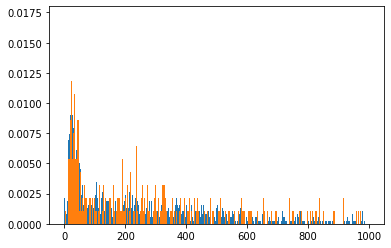

In [ ]:
train_sentence_length = [ len(text.split()) for text in train_AJGT['Text_seg']]
test_sentence_length = [ len(text.split()) for text in test_AJGT['Text_seg']]

print("Max of train len: ",np.max(train_sentence_length))
print("Max of test len: ",np.max(test_sentence_length))
import matplotlib.pyplot as plt

plt.hist(train_sentence_length,bins= range(1000),density=True)
plt.hist(test_sentence_length,bins= range(1000),density=True)
plt.show()